# Plot single class Test IoU after final incremental step

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
import os
import json
os.chdir("/home/thesis/marx/wilson_gen")
import sys
sys.path.insert(0, "/home/thesis/marx/wilson_gen/WILSON")
from WILSON import tasks

wandb.login()
api = wandb.Api()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: gooogleon (gooogleon-uni-hd). Use `wandb login --relogin` to force relogin


In [ ]:
RUN_NAMES = [
    "Incr",
    "Incr_OD_Inp",
]

TASKS = [
    "10-10",
    "10-5",
    "15-1",
    "10-1",
]

In [ ]:
runs = api.runs("gooogleon-uni-hd/WILSON")

task_to_runs = {task: {"dj": [], "ov": []} for task in TASKS}
od_task_to_runs = {task: {"dj": [], "ov": []} for task in TASKS}
for run in runs:
    if "task_comp" in run.tags:
        if not ("intermediate" in run.tags):
            if not ("Base" in run.name):
                task = run.name.split("_")[0][4:].replace("-ov", "")
                ov = "ov" if "-ov" in run.name else "dj"
                if "OD_Inp" in run.name:
                    od_task_to_runs[task][ov].append(run)
                else:
                    task_to_runs[task][ov].append(run)

    # dj_runs = [f"{'_'.join(run.name.split('_')[1:])}_{run.config['step']}": run for run in runs if (("_".join(run.name.split("_")[1:]) in RUN_NAMES) and (f"-{task}_" in run.name))]
    # ov_runs = [f"{'_'.join(run.name.split('_')[1:])}_{run.config['step']}": run for run in runs if (("_".join(run.name.split("_")[1:]) in RUN_NAMES) and (f"-{task}-ov" in run.name))]
    # task_to_runs[task]["dj"] = dj_runs
    # task_to_runs[task]["ov"] = ov_runs

for task in TASKS:
    print(task)
    for run_type in ["dj", "ov"]:
        print(f"  {run_type}")
        for od in [False, True]:
            if od:
                print(f"    OD_Inp")
                print(f"      {od_task_to_runs[task][run_type]}")
            else:
                print(f"    No Inp")
                print(f"      {task_to_runs[task][run_type]}")

10-10
  dj
    No Inp
      [<Run gooogleon-uni-hd/WILSON/2503o5q1 (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/i12y5k2y (finished)>]
  ov
    No Inp
      [<Run gooogleon-uni-hd/WILSON/cym8r0uc (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/iqpwdyhw (finished)>]
10-5
  dj
    No Inp
      [<Run gooogleon-uni-hd/WILSON/hhuczt7v (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/ounhdcyb (finished)>]
  ov
    No Inp
      [<Run gooogleon-uni-hd/WILSON/an48hdjt (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/k11zs8z9 (finished)>]
15-1
  dj
    No Inp
      [<Run gooogleon-uni-hd/WILSON/i7km5vml (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/a1x5iisl (finished)>]
  ov
    No Inp
      [<Run gooogleon-uni-hd/WILSON/adrouiwa (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/035smp3h (finished)>]
10-1
  dj
    No Inp
      [<Run gooogleon-uni-hd/WILSON/jf27inkq (finished)>]
    OD_Inp
      [<Run gooogleon-uni-hd/WILSON/

In [4]:
id_to_logdir = {}
for logdir in os.listdir("WILSON/wandb"):
    id = logdir.split("-")[-1]
    id_to_logdir[id] = logdir

In [5]:
classes = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "dining_table",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted_plant",
    "sheep",
    "sofa",
    "train",
    "tv_monitor",
]

In [9]:
def get_data(run):
    table_loc = f"WILSON/wandb/{id_to_logdir[run.id]}/files/media/table/Test/Class_IoU/{run.config['step']}/"
    table_path = table_loc + os.listdir(table_loc)[0]
    with open(table_path) as f:
        table_data = json.load(f)
    columns = table_data["columns"]
    data = table_data["data"][0]
    return columns, data

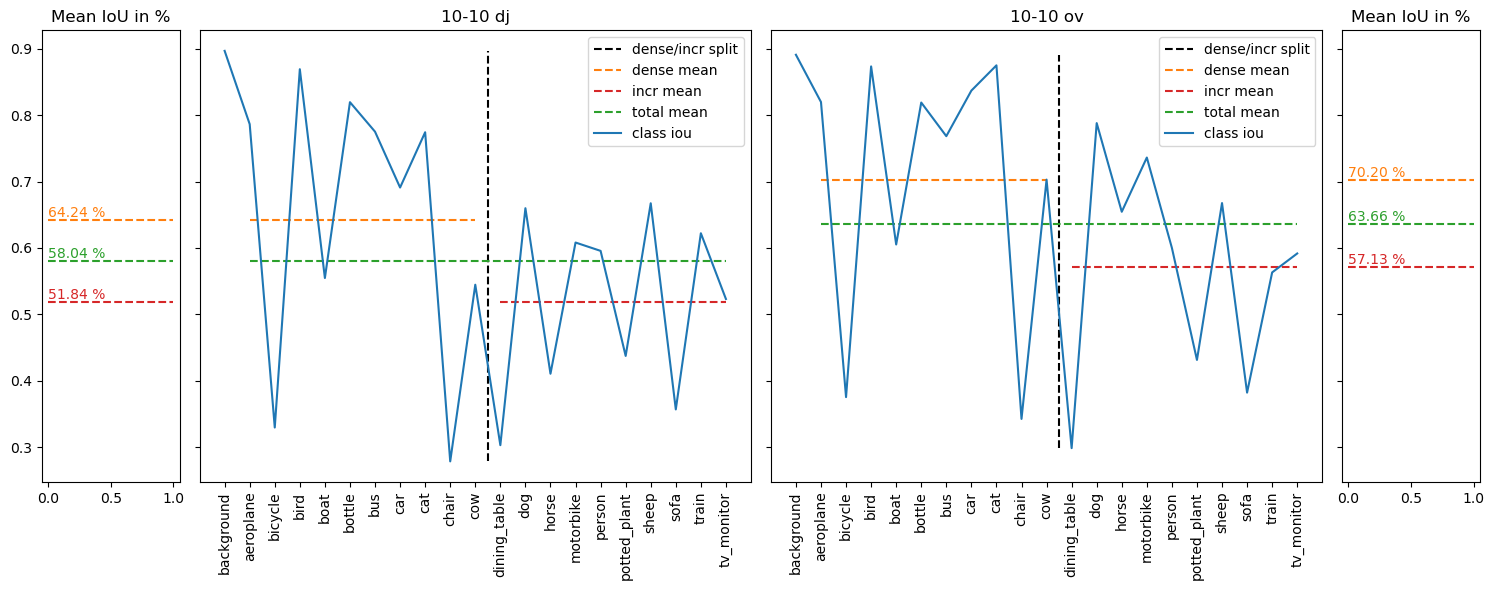

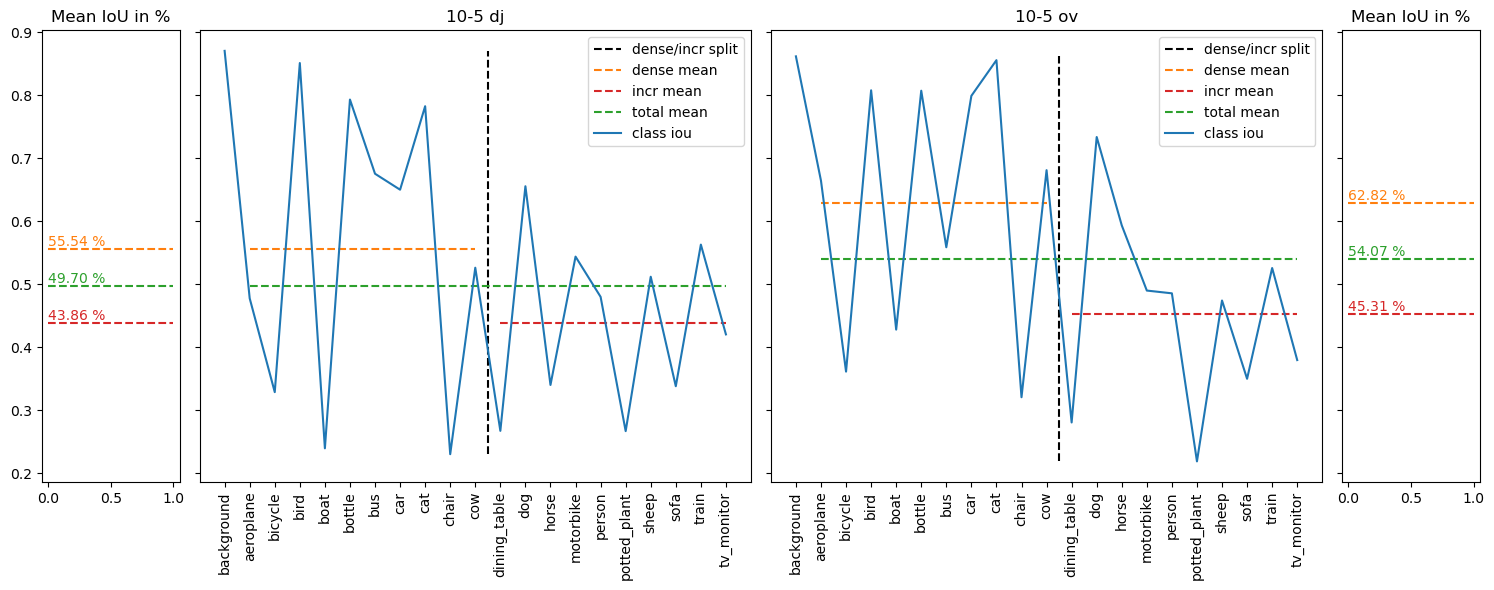

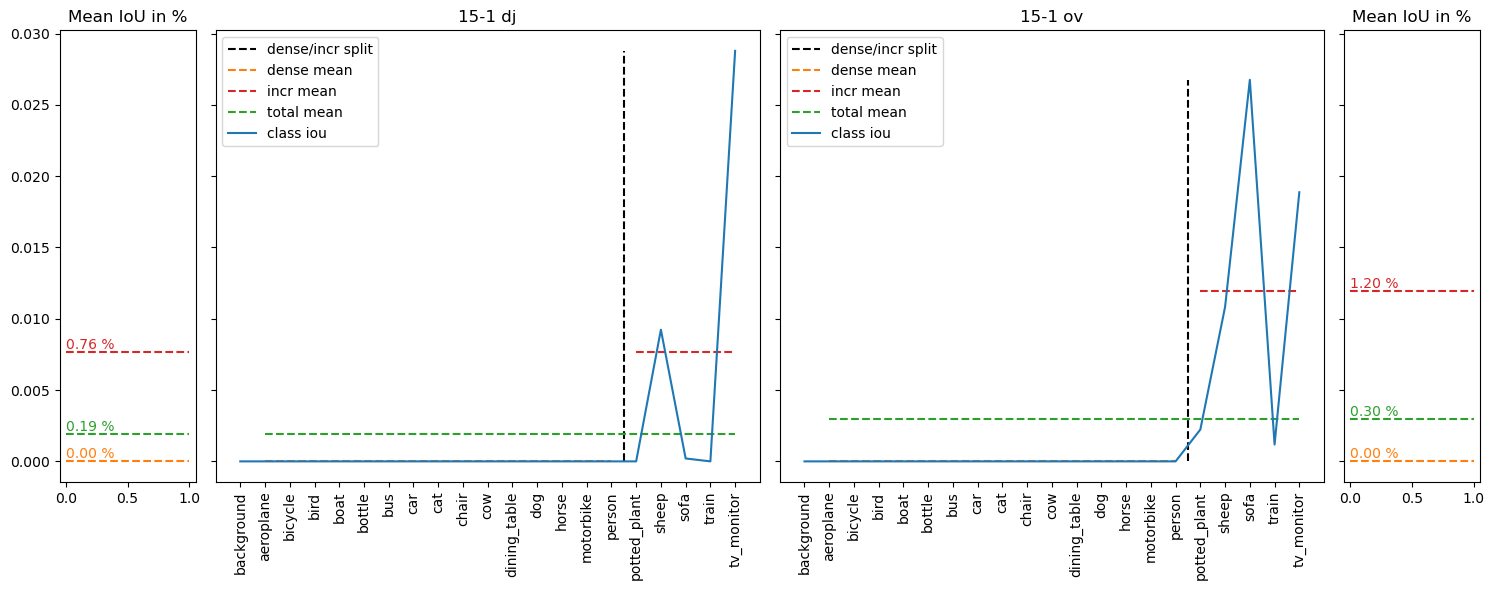

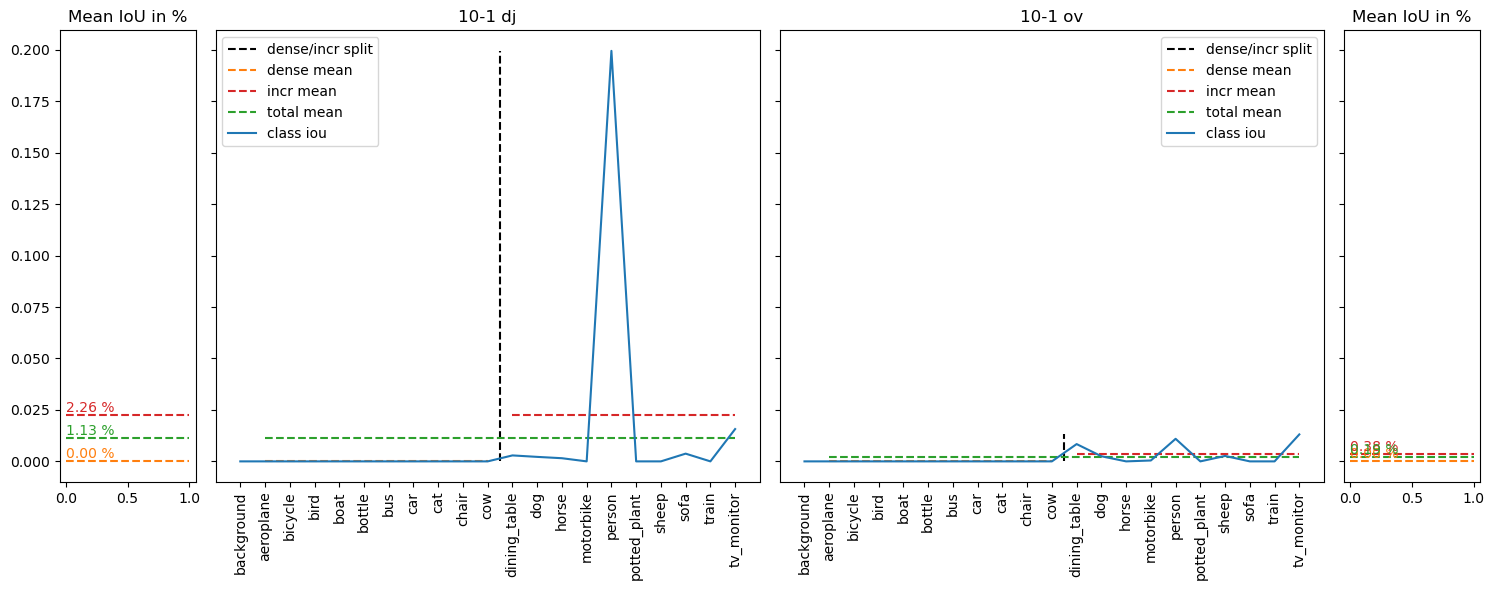

In [10]:
for task in TASKS:
    fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True, width_ratios=[0.5, 2, 2, 0.5])
    for i, run_type in enumerate(["dj", "ov"]):
        try:
            last_run_key = list(task_to_runs[task][run_type].keys())[-1]
        except IndexError:
            print(f"no {run_type} run for {task}")
            continue
        run = task_to_runs[task][run_type][last_run_key]
        columns, data = get_data(run)
        # print(task, run.config["step"])
        # print(columns)
        # print(data)

        n_dense = int(run.config["task"].split("-")[0]) + 1
        dense_mean = np.mean(data[1:n_dense])
        incr_mean = np.mean(data[n_dense:])
        tot_mean = np.mean(data[1:])

        axes[i+1].plot([n_dense - 0.5, n_dense - 0.5], [min(data), max(data)], "k--", label="dense/incr split")
        axes[i+1].plot([1, n_dense - 1], [dense_mean, dense_mean], "C1--", label="dense mean")
        axes[i+1].plot([n_dense, 20], [incr_mean, incr_mean], "C3--", label="incr mean")
        axes[i+1].plot([1, 20], [tot_mean, tot_mean], "C2--", label="total mean")
        axes[i+1].plot(columns, data, label="class iou")
        axes[i+1].set_xticks(columns, [classes[i] for i in columns], rotation=90)
        axes[i+1].set_title(f"{task} {run_type}")
        axes[i+1].legend()
        if i == 0:
            axes[i].set_title("Mean IoU in %")
            axes[i].plot([0, 1], [dense_mean, dense_mean], "C1--", label="dense mean")
            axes[i].plot([0, 1], [incr_mean, incr_mean], "C3--", label="incr mean")
            axes[i].plot([0, 1], [tot_mean, tot_mean], "C2--", label="total mean")
            axes[i].text(0, dense_mean, f"{100 * dense_mean:.2f} %", ha="left", va="bottom", color="C1")
            axes[i].text(0, incr_mean, f"{100 * incr_mean:.2f} %", ha="left", va="bottom", color="C3")
            axes[i].text(0, tot_mean, f"{100 * tot_mean:.2f} %", ha="left", va="bottom", color="C2")
        elif i == 1:
            axes[i+2].set_title("Mean IoU in %")
            axes[i+2].plot([0, 1], [dense_mean, dense_mean], "C1--", label="dense mean")
            axes[i+2].plot([0, 1], [incr_mean, incr_mean], "C3--", label="incr mean")
            axes[i+2].plot([0, 1], [tot_mean, tot_mean], "C2--", label="total mean")
            axes[i+2].text(0, dense_mean, f"{100 * dense_mean:.2f} %", ha="left", va="bottom", color="C1")
            axes[i+2].text(0, incr_mean, f"{100 * incr_mean:.2f} %", ha="left", va="bottom", color="C3")
            axes[i+2].text(0, tot_mean, f"{100 * tot_mean:.2f} %", ha="left", va="bottom", color="C2")
    plt.tight_layout()
    plt.show()